# Zomato Banglore Data Analysis Project

## ==> 1. Data Import and Data Exploration

### Importing Libraries

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter

### Read zomato data in a dataframe

In [2]:
df = pd.read_csv('zomato.csv')

### Explore zomato data

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}: {df[column].unique()}")

Unique values in url: ['https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 'https://www.zomato.com/SanchurroBangalore?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwiMTgzNzU0NzQiLDU5MDkwLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19'
 ...
 'https://www.zomato.com/bangalore/plunge-sheraton-grand-bengaluru-whitefield-hotel-convention-centre-whitefield-bangalore?context=eyJzZSI6eyJlIjpbIjE4NjAyNDc4IiwiMTgyOTAwNTIiLCI1ODM1NCIsIjE4NzQxMTI5IiwxODY2MTA0MCwiMTg2NjEwODQiLCIxODY5MDgzNyJdLCJ0IjoiUHVicyAmYW1wOyB

In [7]:
# Count of unique values in categorical columns
for column in ['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']:
    print(df[column].value_counts())
    print('\n')

online_order
Yes    30444
No     21273
Name: count, dtype: int64


book_table
No     45268
Yes     6449
Name: count, dtype: int64


location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64


rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64


cuisines
North Indian                      

### Handle missing Data


In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

 It looks like all the necessary data is already here. So we will not touch it

## ==> 2. Data Cleaning

### ->cleaning rate column


In [9]:
unwanted_values=['NEW','-']
df['rate'] = df['rate'].replace(unwanted_values, 3)

In [10]:
df['rate'] = df['rate'].str.split('/').str[0].astype(float)
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [11]:
df['rate'].value_counts()

rate
3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: count, dtype: int64

### Cleaning reviews_list column

In [12]:
df['reviews_list'] = df['reviews_list'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))
df['reviews_list'] = df['reviews_list'].apply(lambda x: re.sub(r'\\x[0-9a-fA-F]{2}', '', x))
df['reviews_list'] = df['reviews_list'].str.replace(r'Rated[\s\d.]+|RATED|\\+|\'|\\n', '', regex=True)
df['reviews_list'] = df['reviews_list'].str.replace(r',+\s*', '', regex=True)
df['reviews_list'].unique()

array(['[(n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.)(n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papadpanner and baby corn starterslemon and corrionder soupbutter rotiolive and chilli paratha. Food was fresh and goodservice is good too. Good for family hangout.nCheers)(n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this place is mostly visited by vegetarians. Anyways we ordered ala carte items which took age

### Cleaning Menu Column

In [13]:
df['menu_item'] = df['menu_item'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))
df['menu_item'] = df['menu_item'].str.replace(r'\\x[0-9a-fA-F]{2}', '', regex=True)
df['menu_item'] = df['menu_item'].str.replace("\\+|\\n", '', regex=True)
df['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [14]:
df['menu_item'] = df['menu_item'].apply(ast.literal_eval)

In [15]:
df['num_menu_items'] = df['menu_item'].apply(lambda x: len(x) if isinstance(x, list) else 0)

### Doing Restaurant type column

###### Split 'rest_type' into a list of rest_type

In [16]:
df['rest_type']= df['rest_type'].str.split(', ')


In [17]:
# Create a new column for the first rest type
df['first_rest_type'] = df['rest_type'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)


In [18]:
# Create a new column for the second rest type
df['second_rest_type'] = df['rest_type'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)


### Doing approx_cost(for two people) column

##### Convert 'approx_cost(for two people)' to numeric

In [19]:
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

### Doing dish_liked column

###### Split 'dish_liked' into a list of dish_liked

In [20]:
df['dish_liked'] = df['dish_liked'].str.split(', ')


In [21]:
# Count occurrences of each dish liked
dish_liked_counts = Counter(dish for likes in df['dish_liked'] if isinstance(likes, list) for dish in likes)


In [22]:
# Create a DataFrame from the Counter
count_df_dish_liked = pd.DataFrame(list(dish_liked_counts.items()), columns=['Dish Liked', 'Count']).sort_values(by='Count',ascending=False).head(10)
count_df_dish_liked

,Dish Liked,Count
0,Pasta,3409
57,Burgers,3024
332,Cocktails,2832
33,Pizza,2737
83,Biryani,2092
35,Coffee,1994
34,Mocktails,1887
37,Sandwiches,1676
73,Paratha,1566
75,Noodles,1415


# DATA ANALYSIS

## Online Presence Analysis:

### What is the distribution of restaurants that offer online orders?

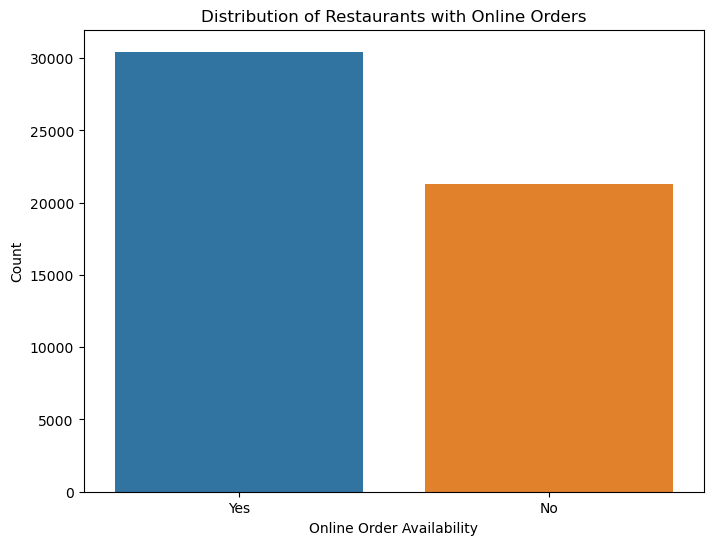

In [23]:
# Distribution of restaurants with online orders
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data=df)
plt.title('Distribution of Restaurants with Online Orders')
plt.xlabel('Online Order Availability')
plt.ylabel('Count')
plt.show()

### Is there any correlation between online order availability and the overall rating?

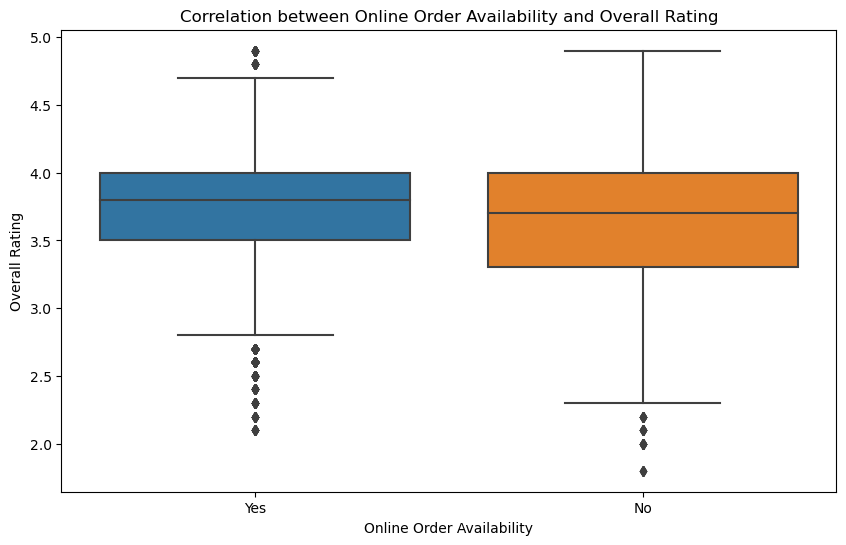

In [24]:
# Correlation between online order availability and overall rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=df, order=['Yes', 'No'])
plt.title('Correlation between Online Order Availability and Overall Rating')
plt.xlabel('Online Order Availability')
plt.ylabel('Overall Rating')
plt.show()

## Booking Trends:

### How many restaurants allow table booking?

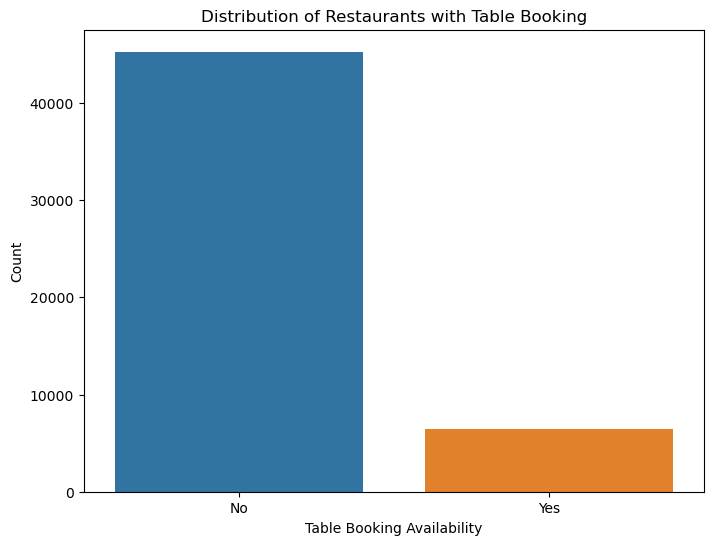

In [25]:
# How many restaurants allow table booking?
booking_counts = df['book_table'].value_counts()

# Plot the distribution of restaurants with and without table booking
plt.figure(figsize=(8, 6))
sns.barplot(x=booking_counts.index, y=booking_counts.values)
plt.title('Distribution of Restaurants with Table Booking')
plt.xlabel('Table Booking Availability')
plt.ylabel('Count')
plt.show()

### Are restaurants with booking options more likely to have higher ratings?

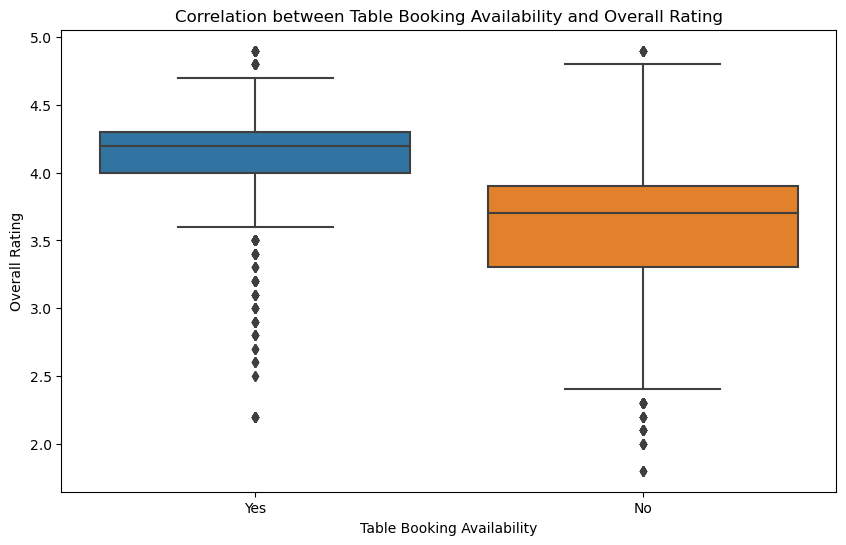

In [26]:
# Are restaurants with booking options more likely to have higher ratings?
plt.figure(figsize=(10, 6))
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Correlation between Table Booking Availability and Overall Rating')
plt.xlabel('Table Booking Availability')
plt.ylabel('Overall Rating')
plt.show()

## Rating and Votes Analysis:

### Is there a correlation between the average rating and the number of votes received?

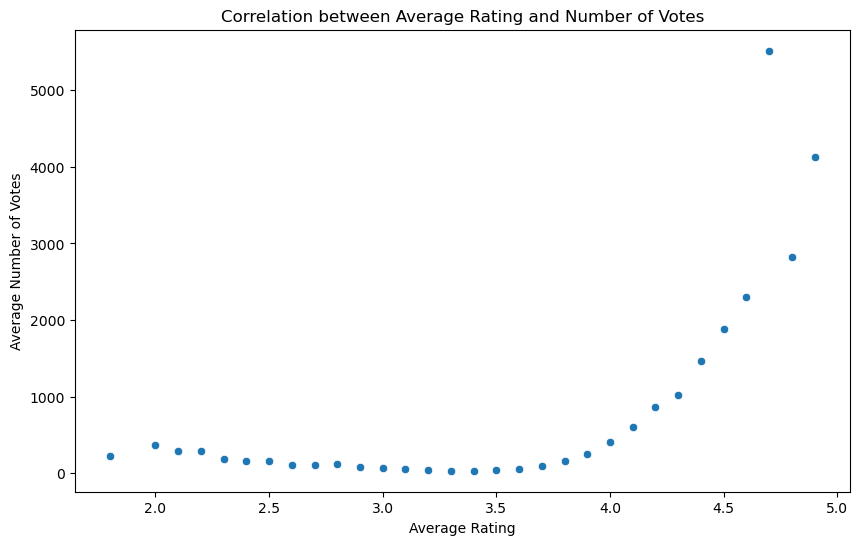

In [27]:
# Correlation between average rating and the number of votes
avg_rating_votes_corr = df[['rate', 'votes']].dropna().groupby('rate').mean()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=avg_rating_votes_corr.index, y='votes', data=avg_rating_votes_corr)
plt.title('Correlation between Average Rating and Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Average Number of Votes')
plt.show()

### What is the distribution of ratings and votes across different locations?

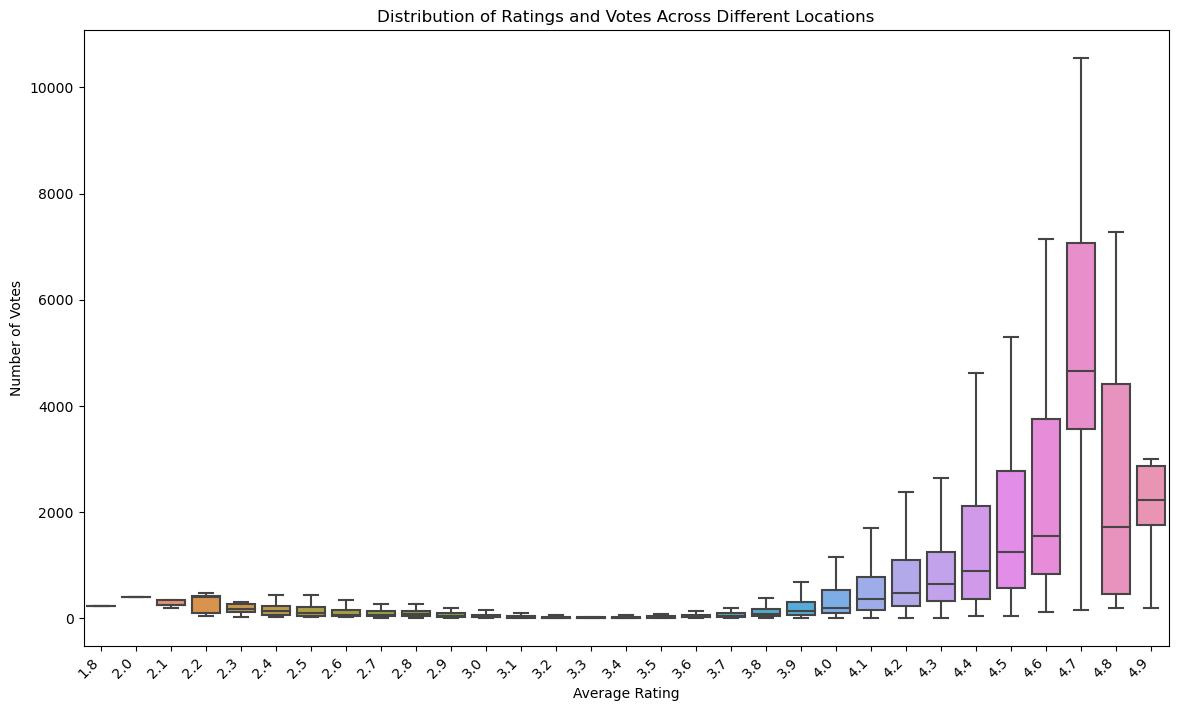

In [28]:
# Distribution of ratings and votes across different locations
plt.figure(figsize=(14, 8))
sns.boxplot(x='rate', y='votes', data=df, showfliers=False)
plt.title('Distribution of Ratings and Votes Across Different Locations')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.show()

## Cuisine Analysis:

### What are the most popular cuisines among the listed restaurants?

In [29]:
# Split the 'cuisines' column into a list of cuisines
df['cuisines'] = df['cuisines'].str.split(', ')

In [30]:
# Exploring the most popular cuisines
all_cuisines_count = Counter(cuisine for cuisines_list in df['cuisines'] if isinstance(cuisines_list, list) for cuisine in cuisines_list)
popular_cuisines = pd.DataFrame.from_dict(all_cuisines_count, orient='index', columns=['Count']).reset_index().sort_values(by='Count',ascending=False).head(10)
popular_cuisines.columns = ['cuisines', 'Count']
popular_cuisines.set_index('cuisines',inplace=True)
popular_cuisines

,Count
cuisines,
North Indian,21085
Chinese,15547
South Indian,8644
Fast Food,8096
Biryani,6492
Continental,5765
Desserts,5633
Cafe,5303
Beverages,4747


<Figure size 1200x600 with 0 Axes>

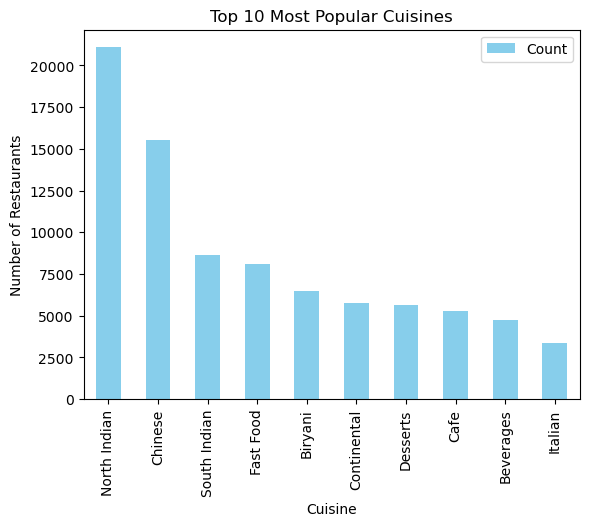

In [31]:
# Plot the distribution of the most popular cuisines
plt.figure(figsize=(12, 6))
popular_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.show()

## Menu Item Insights:

### What are the top 10 menu items restaurants have?

In [32]:
# Flatten the list of menu items across all restaurants
all_menu_items = [item for sublist in df['menu_item'] for item in sublist]

In [33]:
# Get the top 5 most frequently ordered menu items
top_menu_items = Counter(all_menu_items).most_common(10)

In [34]:
# Display the top menu items
print("Top 5 Most Frequently Ordered Menu Items:")
for item, count in top_menu_items:
    print(f"{item}: {count} times")


Top 5 Most Frequently Ordered Menu Items:
Chicken Fried Rice: 4550 times
Veg Fried Rice: 4306 times
Paneer Butter Masala: 3883 times
Jeera Rice: 3776 times
Egg Fried Rice: 3404 times
Gobi Manchurian: 3386 times
Ghee Rice: 3273 times
Chicken Biryani: 3119 times
Veg Biryani: 2945 times
Paneer Manchurian: 2836 times


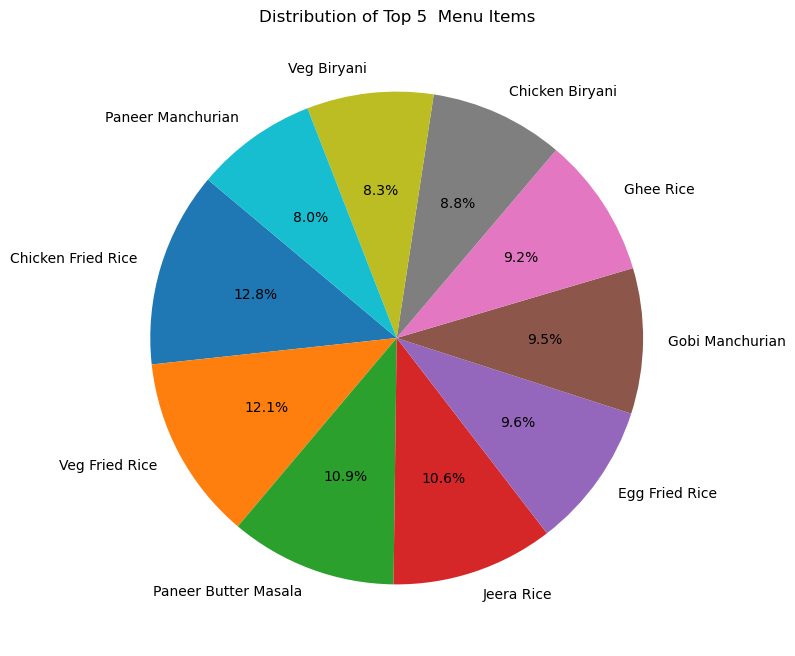

In [35]:
# Plot a pie chart for the top menu items
labels, sizes = zip(*top_menu_items)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5  Menu Items')
plt.show()

### What are the top 10 most liked dishes ?

In [36]:
count_df_dish_liked.set_index('Dish Liked',inplace=True)
count_df_dish_liked

,Count
Dish Liked,
Pasta,3409
Burgers,3024
Cocktails,2832
Pizza,2737
Biryani,2092
Coffee,1994
Mocktails,1887
Sandwiches,1676
Paratha,1566


<Figure size 1200x600 with 0 Axes>

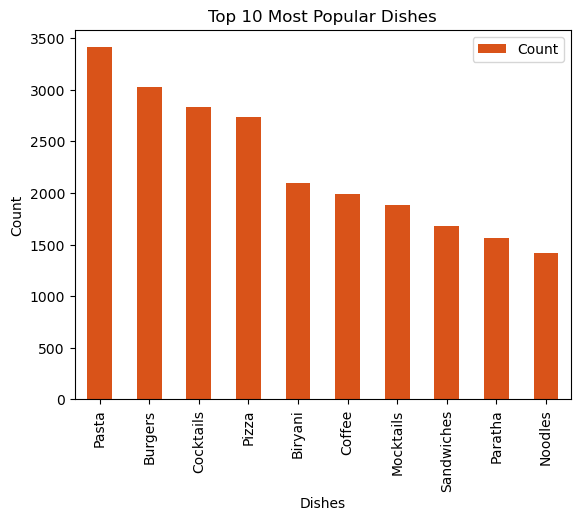

In [57]:
plt.figure(figsize=(12, 6))
count_df_dish_liked.plot(kind='bar', color=(0.8500,0.3250,0.0980))
plt.title('Top 10 Most Popular Dishes')
plt.xlabel('Dishes')
plt.ylabel('Count')
plt.show()

### Is there a relationship between the number of menu items offered and the restaurant's rating?

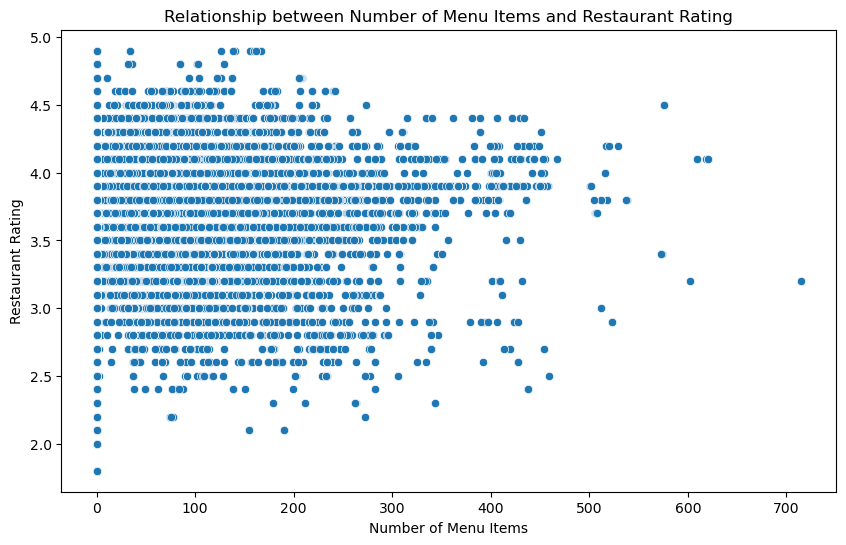

In [38]:
# Check if there's a relationship between the number of menu items offered and the restaurant's rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_menu_items', y='rate', data=df)
plt.title('Relationship between Number of Menu Items and Restaurant Rating')
plt.xlabel('Number of Menu Items')
plt.ylabel('Restaurant Rating')
plt.show()

## Location-Based Analysis:

### How does the distribution of restaurant ratings vary across different locations?

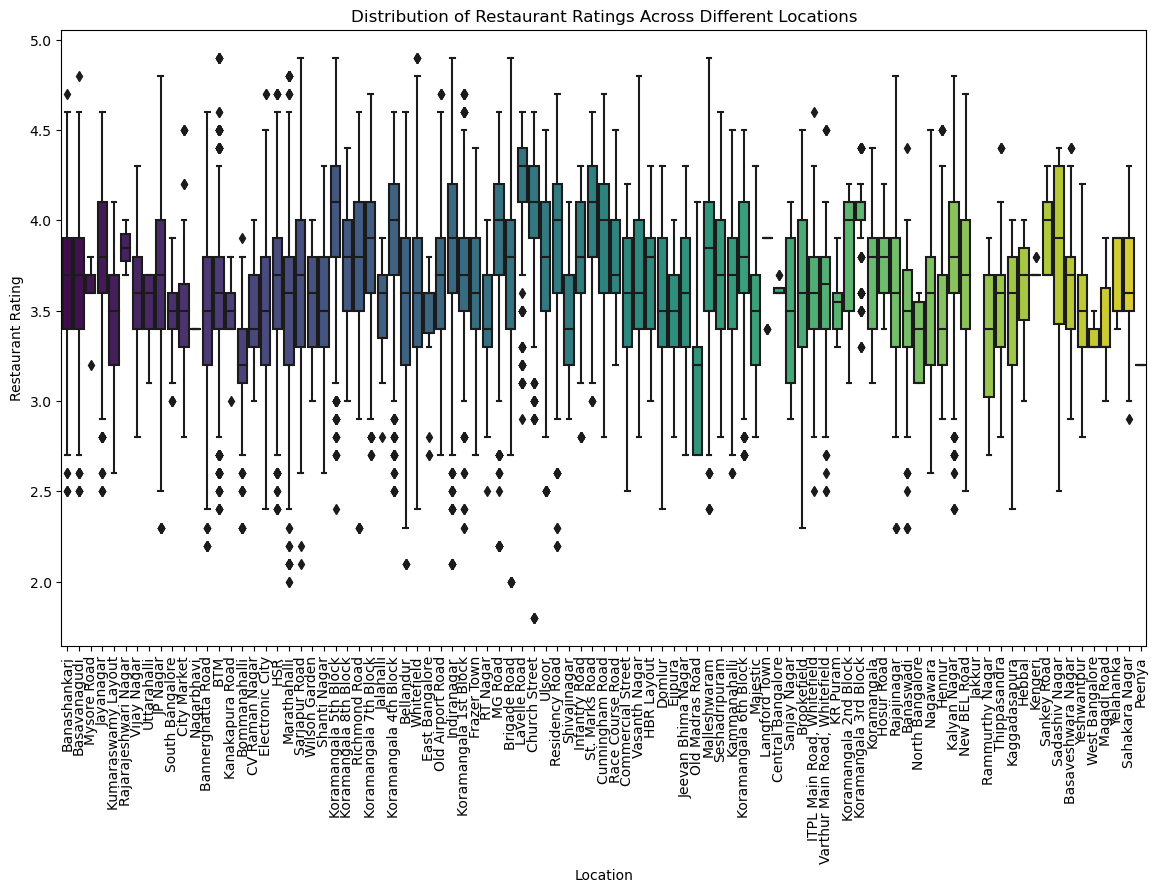

In [39]:
# Plot the distribution of restaurant ratings across different locations
plt.figure(figsize=(14, 8))
sns.boxplot(x='location', y='rate', data=df, palette='viridis')
plt.title('Distribution of Restaurant Ratings Across Different Locations')
plt.xlabel('Location')
plt.ylabel('Restaurant Rating')
plt.xticks(rotation=90)
plt.show()

### Are there any location-specific trends in terms of online orders or table bookings?

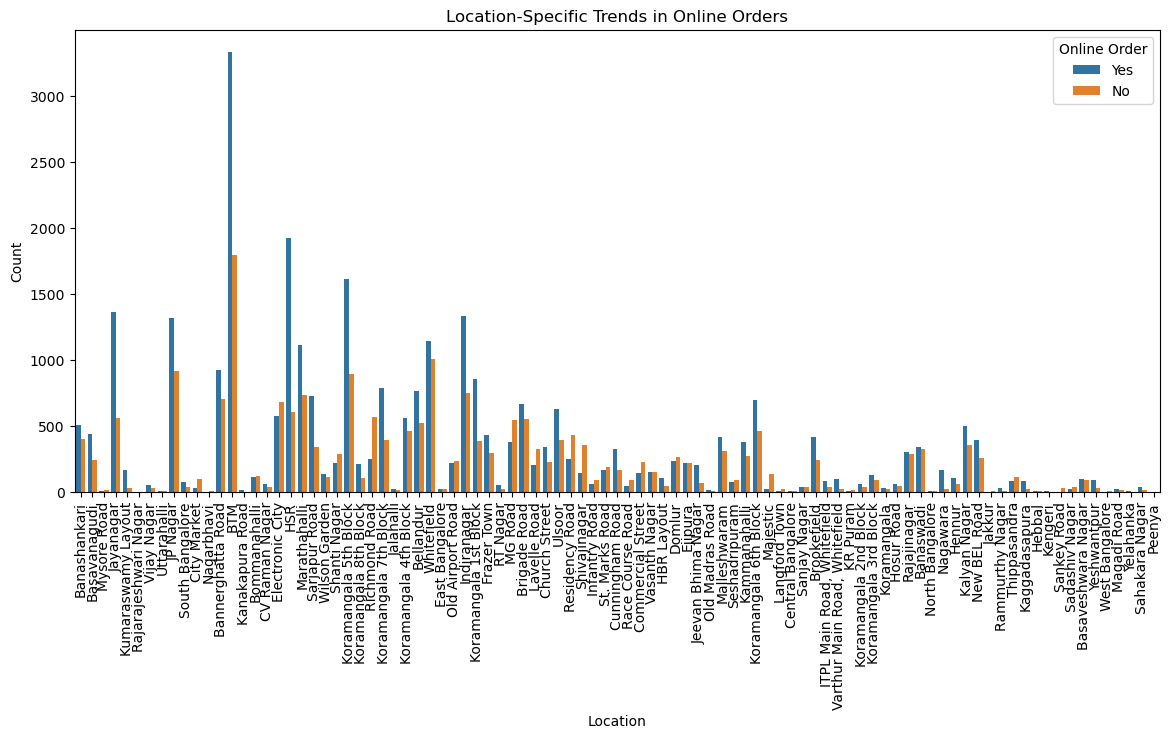

In [40]:
# Location-specific trends in terms of online orders
plt.figure(figsize=(14, 6))
sns.countplot(x='location', hue='online_order', data=df)
plt.title('Location-Specific Trends in Online Orders')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Online Order')
plt.show()

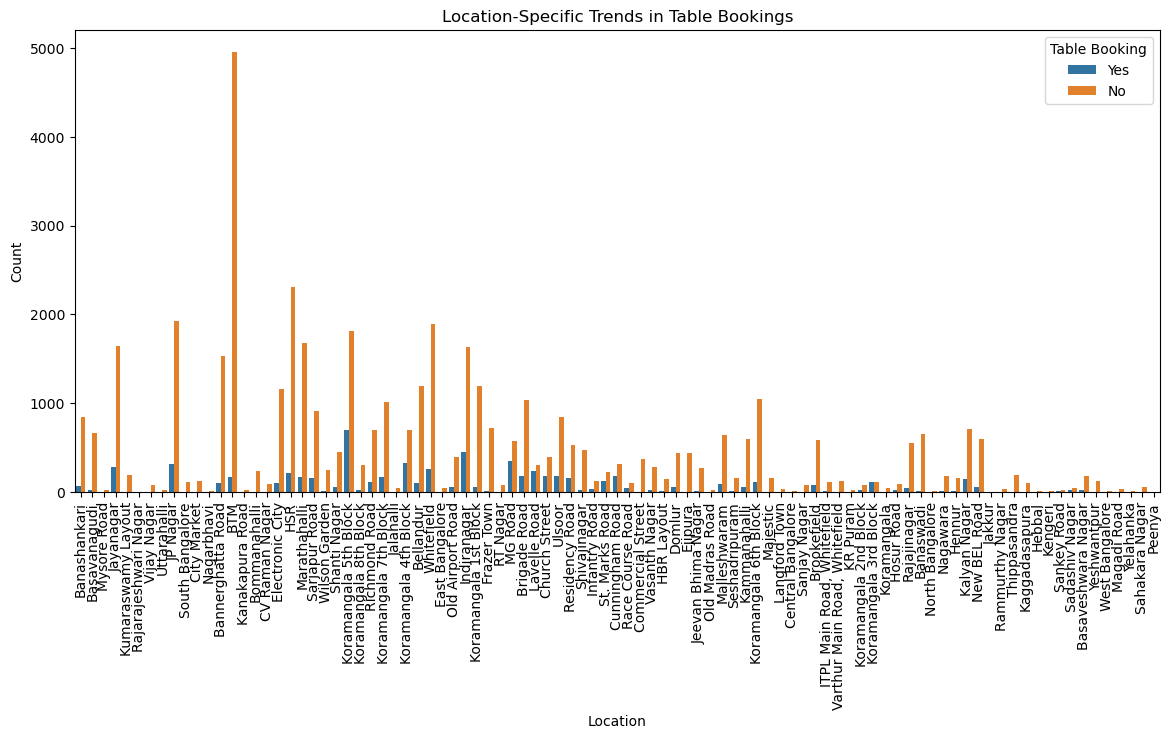

In [41]:
# Location-specific trends in terms of table bookings
plt.figure(figsize=(14, 6))
sns.countplot(x='location', hue='book_table', data=df)
plt.title('Location-Specific Trends in Table Bookings')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Table Booking')
plt.show()

## Cost Analysis:

### What is the average cost for two people in different types of restaurants?

C:\Users\hpram\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\hpram\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


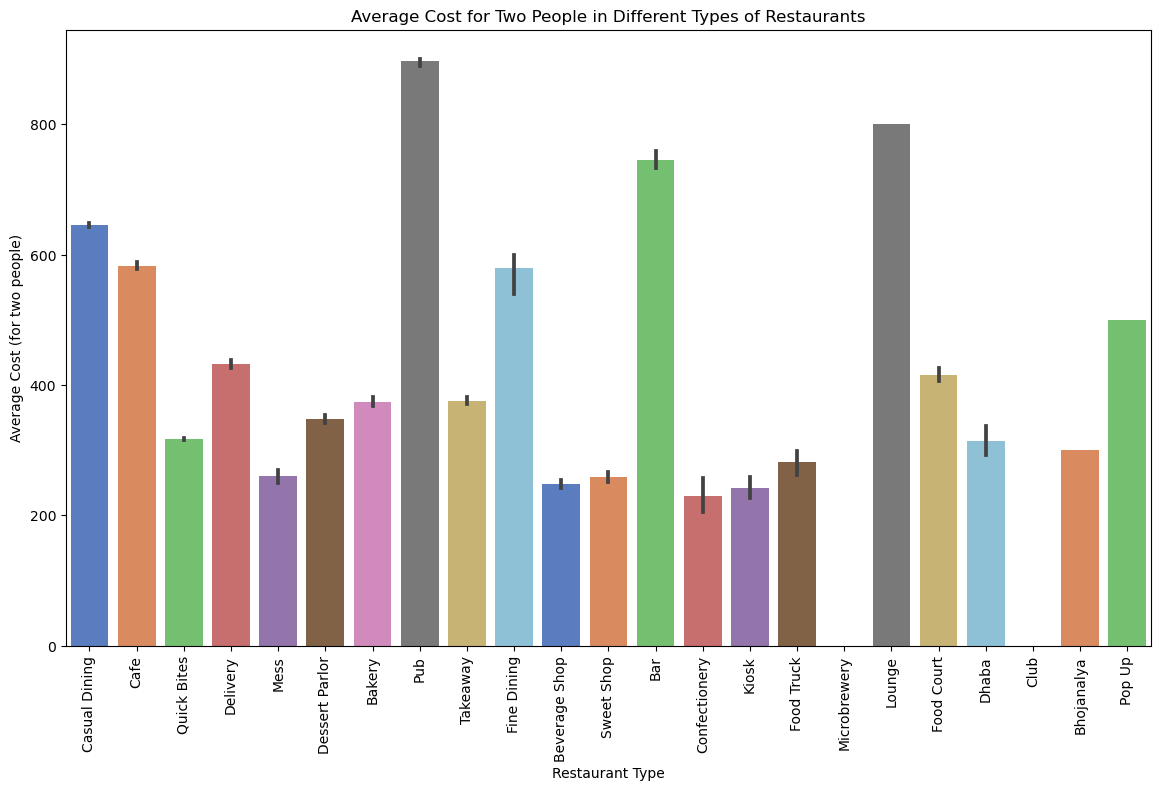

In [42]:
# Plot the average cost for two people in different types of restaurants
plt.figure(figsize=(14, 8))
sns.barplot(x='first_rest_type', y='approx_cost(for two people)', data=df, estimator='mean', palette='muted')
plt.title('Average Cost for Two People in Different Types of Restaurants')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost (for two people)')
plt.xticks(rotation=90)
plt.show()


### Is there a correlation between the cost and the restaurant's rating?

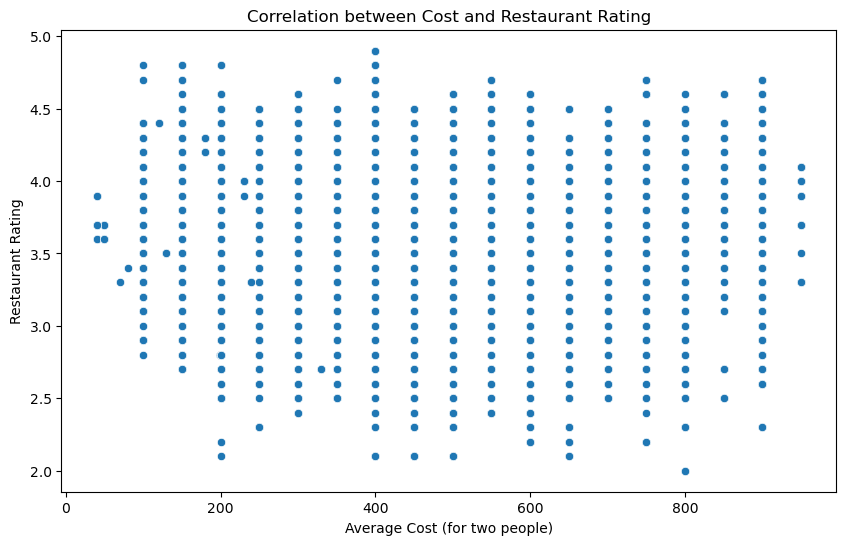

In [43]:
# Check for correlation between cost and restaurant rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title('Correlation between Cost and Restaurant Rating')
plt.xlabel('Average Cost (for two people)')
plt.ylabel('Restaurant Rating')
plt.show()

## Rest Type Exploration:

### What is the distribution of different restaurant types (e.g., cafes, bars, fine dining) in the dataset?

In [44]:
from collections import Counter

# Count occurrences of each rest type
rest_type_counts = Counter(rest_type for types in df['rest_type'] if isinstance(types, list) for rest_type in types)
print(rest_type_counts)

Counter({'Quick Bites': 20639, 'Casual Dining': 13057, 'Cafe': 5074, 'Delivery': 4641, 'Dessert Parlor': 3211, 'Bar': 2457, 'Takeaway': 2157, 'Bakery': 1998, 'Beverage Shop': 1471, 'Pub': 950, 'Food Court': 765, 'Sweet Shop': 745, 'Lounge': 555, 'Fine Dining': 405, 'Microbrewery': 390, 'Mess': 274, 'Kiosk': 192, 'Food Truck': 84, 'Confectionery': 47, 'Club': 41, 'Dhaba': 40, 'Irani Cafee': 15, 'Meat Shop': 4, 'Bhojanalya': 3, 'Pop Up': 2})


In [45]:
# Create a DataFrame from the Counter
count_df = pd.DataFrame(list(rest_type_counts.items()), columns=['Rest Type', 'Count'])
count_df.sort_values(by='Count',ascending=False)

,Rest Type,Count
2,Quick Bites,20639
0,Casual Dining,13057
1,Cafe,5074
3,Delivery,4641
5,Dessert Parlor,3211
12,Bar,2457
8,Takeaway,2157
6,Bakery,1998
10,Beverage Shop,1471
7,Pub,950


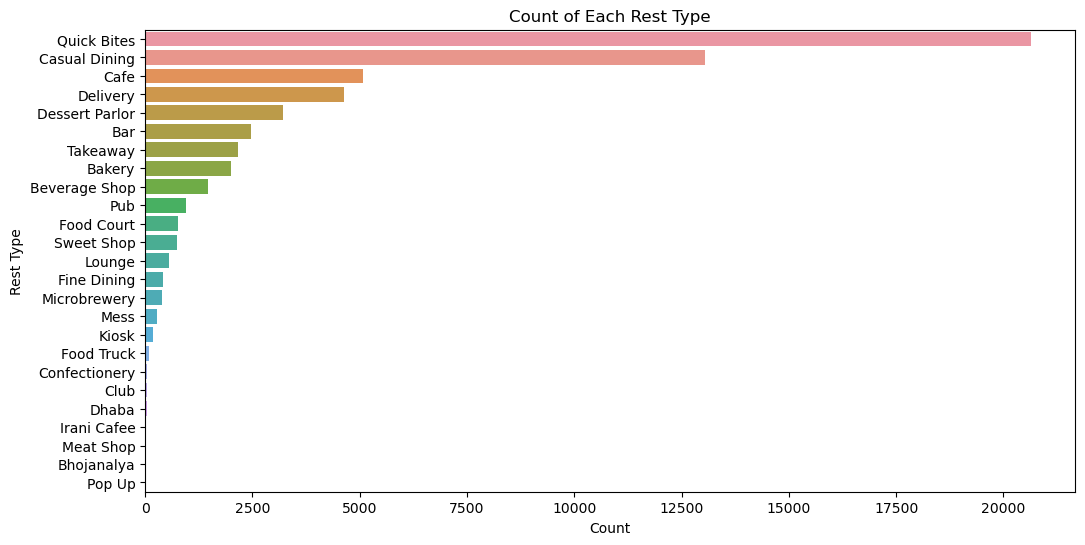

In [46]:
# Plot a count plot chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Rest Type', data=count_df.sort_values(by='Count', ascending=False))
plt.title('Count of Each Rest Type')
plt.xlabel('Count')
plt.ylabel('Rest Type')
plt.show()

### Do specific types of restaurants tend to have higher ratings or more votes?

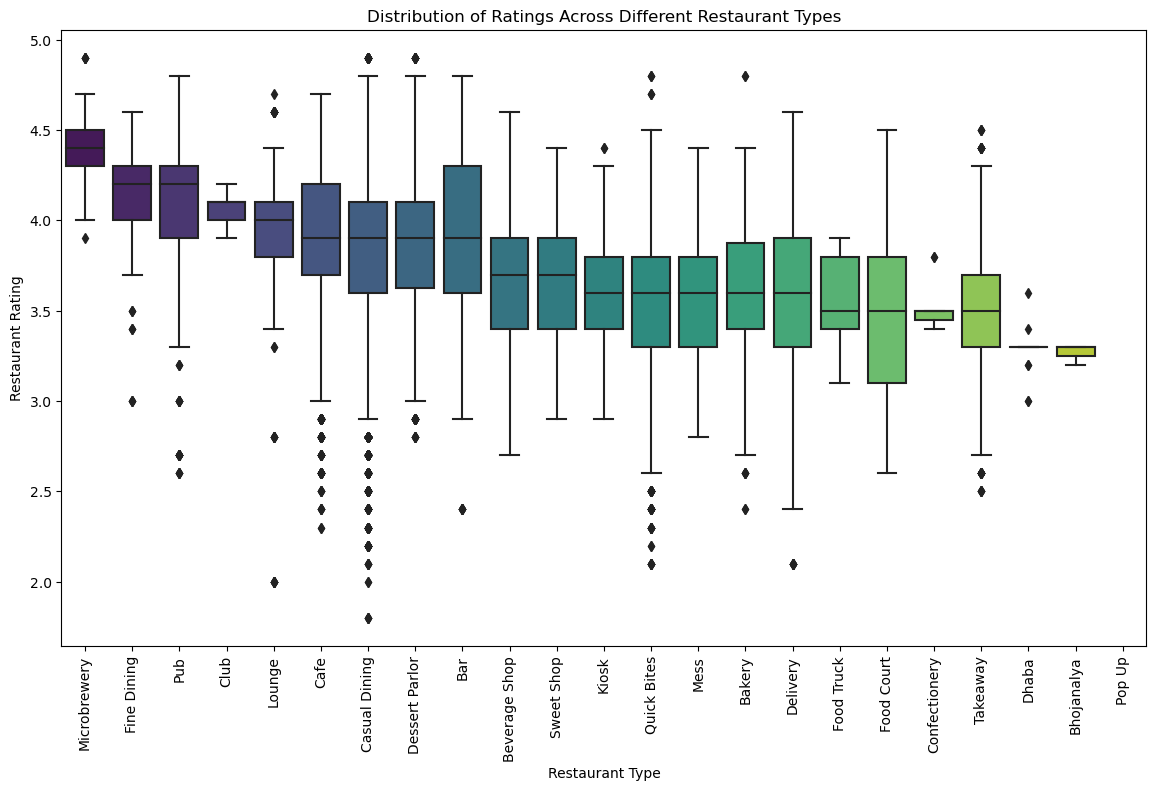

In [47]:
# Check if specific types of restaurants tend to have higher ratings
plt.figure(figsize=(14, 8))
sns.boxplot(x='first_rest_type', y='rate', data=df, palette='viridis', order=df.groupby('first_rest_type')['rate'].median().sort_values(ascending=False).index)
plt.title('Distribution of Ratings Across Different Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Restaurant Rating')
plt.xticks(rotation=90)
plt.show()

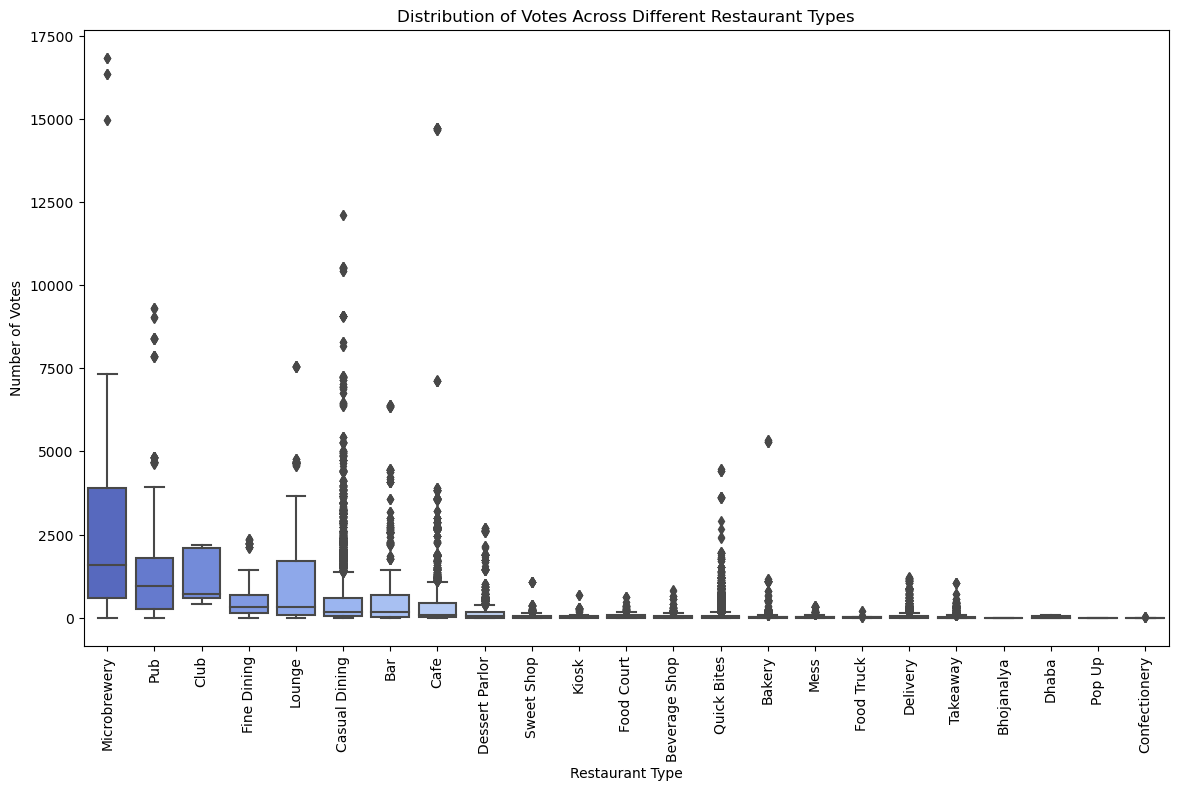

In [48]:
# Check if specific types of restaurants tend to have more votes
plt.figure(figsize=(14, 8))
sns.boxplot(x='first_rest_type', y='votes', data=df, palette='coolwarm', order=df.groupby('first_rest_type')['votes'].median().sort_values(ascending=False).index)
plt.title('Distribution of Votes Across Different Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.show()


## Review Sentiment Analysis:

### Can sentiment analysis be performed on the reviews to identify positive or negative sentiments?

### Is there any correlation between positive reviews and the restaurant's success?

## Listed In Type and City Analysis:

### How are restaurants distributed across different types and cities?

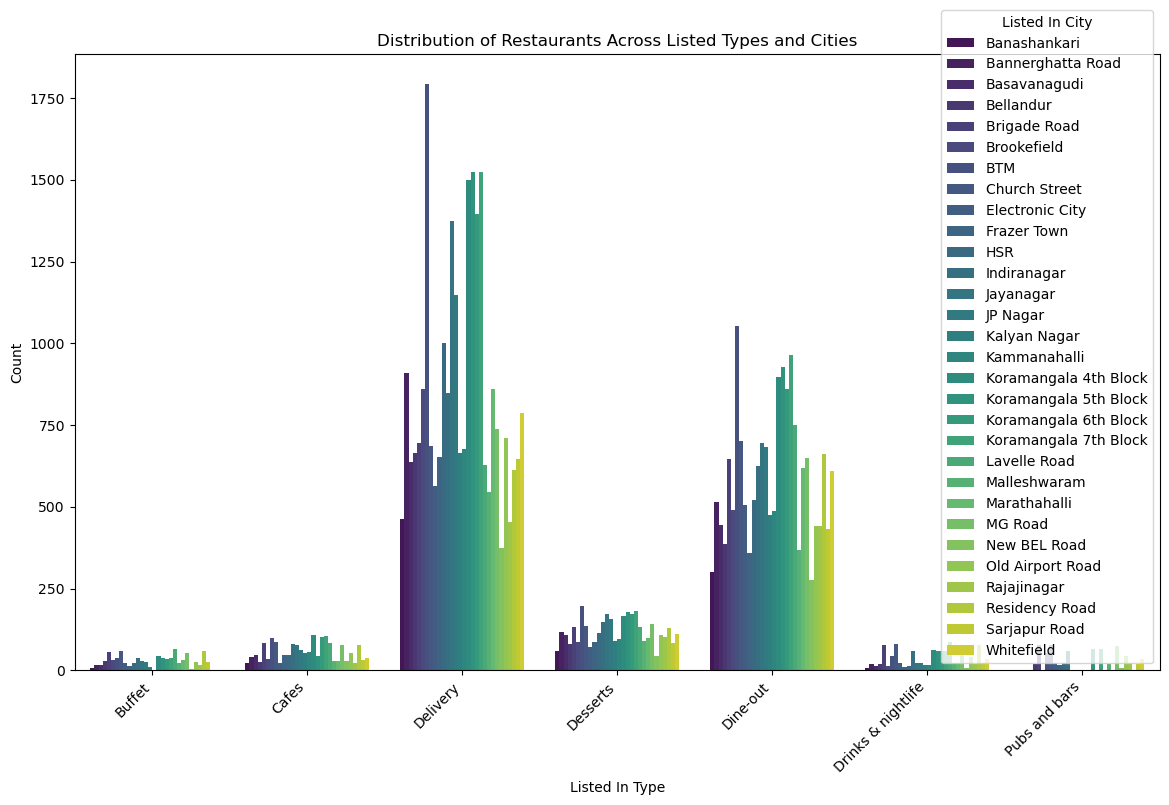

In [49]:
# Plot the distribution of restaurants across different types and cities
plt.figure(figsize=(14, 8))
sns.countplot(x='listed_in(type)', hue='listed_in(city)', data=df, palette='viridis')
plt.title('Distribution of Restaurants Across Listed Types and Cities')
plt.xlabel('Listed In Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Listed In City')
plt.show()

### Is there a relationship between the listed type and the overall rating?

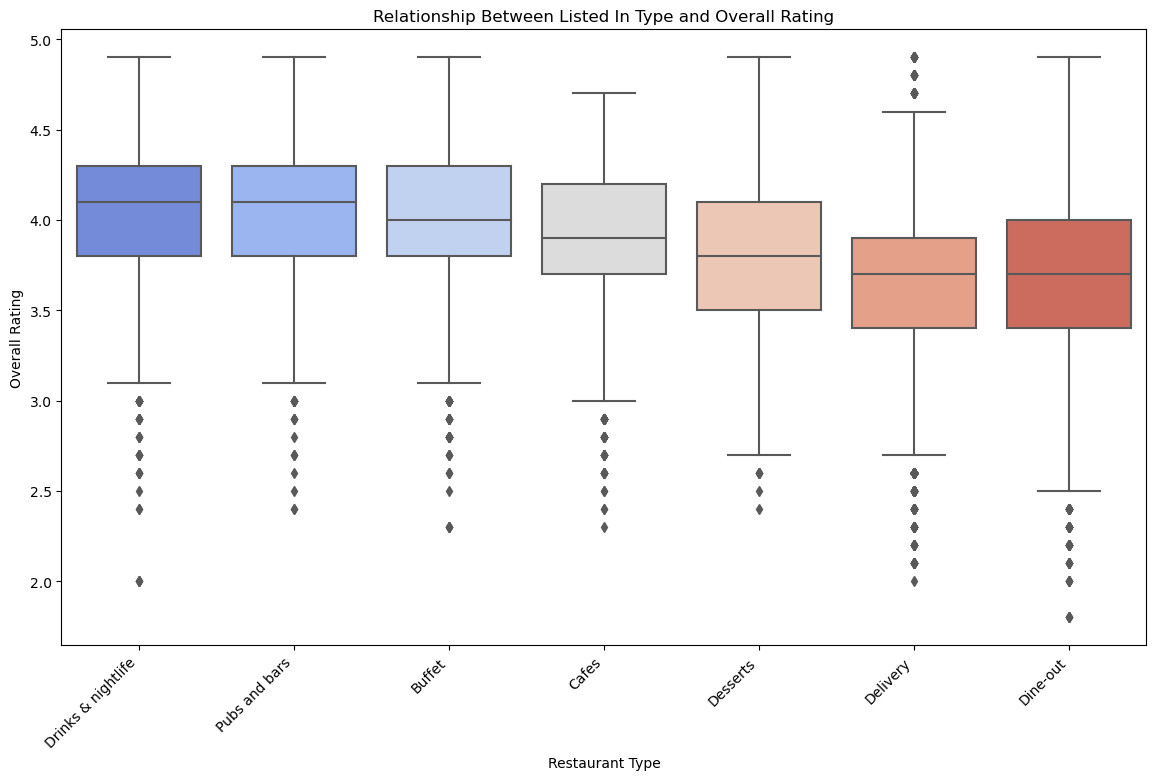

In [50]:
# Check the relationship between listed type and overall rating
plt.figure(figsize=(14, 8))
sns.boxplot(x='listed_in(type)', y='rate', data=df, palette='coolwarm', order=df.groupby('listed_in(type)')['rate'].median().sort_values(ascending=False).index)
plt.title('Relationship Between Listed In Type and Overall Rating')
plt.xlabel('Restaurant Type')
plt.ylabel('Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.show()